In [404]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [405]:
origin_data = pd.read_excel('data_1xlsx.xlsx')

In [406]:
origin_data

,x1,x2,x3,Class
0,5,0.7,7200,1
1,4,0.3,3278,2
2,7,0.8,8110,2
3,8,0.6,6356,2
4,3,0.6,6001,1
5,2,0.5,5342,1
6,9,0.6,6220,2


In [407]:
origin_data.describe()

,x1,x2,x3,Class
count,7.000000,7.000000,7.000000,7.000000
mean,5.428571,0.585714,6072.428571,1.571429
std,2.636737,0.157359,1520.568080,0.534522
min,2.000000,0.300000,3278.000000,1.000000
25%,3.500000,0.550000,5671.500000,1.000000
50%,5.000000,0.600000,6220.000000,2.000000
75%,7.500000,0.650000,6778.000000,2.000000
max,9.000000,0.800000,8110.000000,2.000000


In [408]:
data = origin_data[['x1','x2','x3']]

In [409]:
data

,x1,x2,x3
0,5,0.7,7200
1,4,0.3,3278
2,7,0.8,8110
3,8,0.6,6356
4,3,0.6,6001
5,2,0.5,5342
6,9,0.6,6220


In [410]:
data.mean()

x1       5.428571
x2       0.585714
x3    6072.428571
dtype: float64

In [411]:
data.std()

x1       2.636737
x2       0.157359
x3    1520.568080
dtype: float64

In [412]:
new_data = [[6,0.7,6666],[4,0.2,6320]]
new_data = pd.DataFrame(new_data)

In [413]:
new_data = (new_data - data.mean())/data.std()

Text(0.5, 1.0, 'X1')

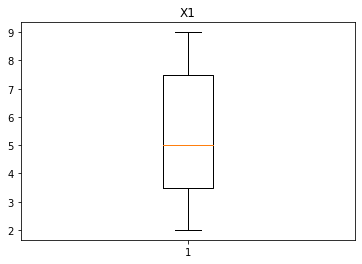

In [414]:
import matplotlib.pyplot as plt
plt.boxplot(data['x1'])
plt.title('X1')

Text(0.5, 1.0, 'X2')

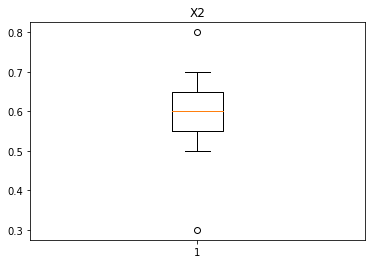

In [415]:
plt.boxplot(data['x2'])
plt.title('X2')

Text(0.5, 1.0, 'X3')

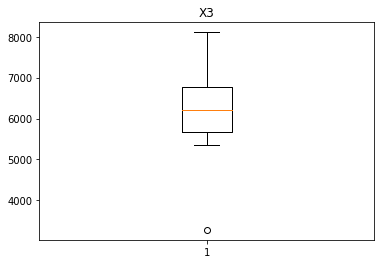

In [416]:
plt.boxplot(data['x3'])
plt.title('X3')

In [417]:
# 이상치가 없으니, 최소-최대 정규화를 사용

In [418]:
data_ms=StandardScaler().fit_transform(data)
data = pd.DataFrame(data_ms, columns = data.columns)

In [419]:
data['Class'] = origin_data['Class']

In [420]:
data

,x1,x2,x3,Class
0,-0.175562,0.784465,0.800961,1
1,-0.585206,-1.961161,-1.985000,2
2,0.643726,1.470871,1.447373,2
3,1.053370,0.098058,0.201433,2
4,-0.994850,0.098058,-0.050739,1
5,-1.404494,-0.588348,-0.518854,1
6,1.463014,0.098058,0.104826,2


In [421]:
data.describe()

,x1,x2,x3,Class
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000
mean,-9.516197e-17,4.460718e-16,-1.090398e-16,1.571429
std,1.080123e+00,1.080123e+00,1.080123e+00,0.534522
min,-1.404494e+00,-1.961161e+00,-1.985000e+00,1.000000
25%,-7.900277e-01,-2.451452e-01,-2.847964e-01,1.000000
50%,-1.755617e-01,9.805807e-02,1.048262e-01,2.000000
75%,8.485483e-01,4.412613e-01,5.011971e-01,2.000000
max,1.463014e+00,1.470871e+00,1.447373e+00,2.000000


In [422]:
data
import copy
test_data = copy.deepcopy(data)

In [423]:
import numpy as np

In [424]:
data = data.values.tolist()
test_data = copy.deepcopy(data)

In [425]:
import math
def eucl_dist(p1, p2):
    dim, sum_ = len(p1), 0
    for index in range(dim-1):
        sum_ += pow((p1[index]-p2[index]),2)
    return math.sqrt(sum_)

In [426]:
def knn(train_set, new_sample,K):
    dists, train_size = {}, len(train_set)
    
    for i in range(train_size):
        d = eucl_dist(train_set[i],new_sample)
        dists[i] = d
        
    k_neighbors = sorted(dists,key=dists.get)[:K]
    
    qty_label1, qty_label2 = 0, 0
    
    for index in k_neighbors:
        if train_set[index][-1] == 1:
            qty_label1 +=1
        else:
            qty_label2 +=1
        
    if qty_label1>qty_label2:
        return 1
    else:
        return 2
#knn 알고리즘 클래스.
# train_set을 입력받아 knn 평가 알고리즘을 형성하고, new_sample을 매게변수로 받아
# new_sample을 labelling한다. (K-nearest로)

In [427]:
correct, K = 0, 3
list_manhattan =[]
for sample in test_data:
    label = knn(data, sample, 3)
    list_manhattan.append(label)
    if sample[-1] == label:
        correct += 1
# test set의 데이터 중 몇개가 정확한지(correct) 평가하는 것.

In [428]:
result =pd.DataFrame(list_manhattan)

In [429]:
result

,0
0,1
1,1
2,2
3,2
4,1
5,1
6,2


In [430]:
print("Train set size: %d" % len(data))
print("Test set size: %d" % len(test_data))
print("Correct predicitons: %d" % correct)
print("Accuracy: %.2f%%" % (100 * correct / len(test_data)))

Train set size: 7
Test set size: 7
Correct predicitons: 6
Accuracy: 85.71%


In [431]:
list_test=[]
for i in test_data:
    list_test.append(i[3])

list_test=pd.Series(list_test)

list_manhattan=pd.Series(list_manhattan)

result=pd.crosstab(list_test,list_manhattan,rownames=['True'],colnames=['Predicted'],margins=True)

result.rename(index={1:"실제 1",2:"실제 2","All":"total"},columns={1:"분류 1 ",2:"분류 2","All":"total"})

Predicted,분류 1,분류 2,total
True,,,
실제 1,3,0,3
실제 2,1,3,4
total,4,3,7


In [432]:
new_data = new_data.values.tolist()

In [433]:
correct, K = 0, 3
num = 1
list_manhattan =[]
for sample in new_data:
    label = knn(data, sample, 3)
    list_manhattan.append(label)
    if sample[-1] == label:
        correct += 1
    print("분류한 {}번째 데이터 값 출력 : ".format(num), label)
    num+=1

분류한 1번째 데이터 값 출력 :  2
분류한 2번째 데이터 값 출력 :  2
